In [51]:

import pandas as pd
import mne
import numpy as np
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
from mne.viz import plot_raw

raw = mne.io.read_raw_edf(r'D:\EEG\EEG_Data_Analysis\dataset\S001\S001R04.edf', preload=True)
print(raw.ch_names)


# Example renaming of channels to match the 'standard_1020' montage
new_names = {
    'Fc5.': 'FC5', 'Fc3.': 'FC3', 'Fc1.': 'FC1', 'Fcz.': 'FCz', 'Fc2.': 'FC2', 'Fc4.': 'FC4', 'Fc6.': 'FC6',
    'C5..': 'C5', 'C3..': 'C3', 'C1..': 'C1', 'Cz..': 'Cz', 'C2..': 'C2', 'C4..': 'C4', 'C6..': 'C6',
    'Cp5.': 'CP5', 'Cp3.': 'CP3', 'Cp1.': 'CP1', 'Cpz.': 'CPz', 'Cp2.': 'CP2', 'Cp4.': 'CP4', 'Cp6.': 'CP6',
    'Fp1.': 'Fp1', 'Fpz.': 'Fpz', 'Fp2.': 'Fp2',
    'Af7.': 'AF7', 'Af3.': 'AF3', 'Afz.': 'AFz', 'Af4.': 'AF4', 'Af8.': 'AF8',
    'F7..': 'F7', 'F5..': 'F5', 'F3..': 'F3', 'F1..': 'F1', 'Fz..': 'Fz', 'F2..': 'F2', 'F4..': 'F4', 'F6..': 'F6', 'F8..': 'F8',
    'Ft7.': 'FT7', 'Ft8.': 'FT8',
    'T7..': 'T7', 'T8..': 'T8', 'T9..': 'T9', 'T10.': 'T10',
    'Tp7.': 'TP7', 'Tp8.': 'TP8',
    'P7..': 'P7', 'P5..': 'P5', 'P3..': 'P3', 'P1..': 'P1', 'Pz..': 'Pz', 'P2..': 'P2', 'P4..': 'P4', 'P6..': 'P6', 'P8..': 'P8',
    'Po7.': 'PO7', 'Po3.': 'PO3', 'Poz.': 'POz', 'Po4.': 'PO4', 'Po8.': 'PO8',
    'O1..': 'O1', 'Oz..': 'Oz', 'O2..': 'O2', 
    'Iz..': 'Iz'
}

raw.rename_channels(new_names)
print(raw.info)
raw.get_channel_types()

montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

print(raw.info['chs'])

events, event_id = mne.events_from_annotations(raw)
print("Events:.....................................................................................")
print( events)
print("Event ID:.....................................................................................")
print(event_id)
print(raw.annotations)

event_dict = {
    "rest": 1,
    "motion/left_fist/both_fist": 2,
    "motion/right_fist/both_feet": 3
    
}

epochs = mne.Epochs(
    raw,
    events,
    event_id=event_dict,
    tmin=-0.2,
    tmax=0.5,
    preload=True,
)

print("epochs:.....................................................................................")
print( epochs)
print( epochs.get_data())

rest_epochs = epochs["rest"]
left_both_fist_epochs = epochs["motion/left_fist/both_fist"]
right_fist_both_feet_epochs = epochs["motion/right_fist/both_feet"]

epochs_data = epochs.to_data_frame()
epochs_data.to_csv('D:\EEG\EEG_Data_Analysis\dataset\S001\epochs_data.csv')
epochs_data


Extracting EDF parameters from D:\EEG\EEG_Data_Analysis\dataset\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
<Info | 8 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 H

C:\Users\sanji\AppData\Local\Temp\ipykernel_10876\3978815477.py:63: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print( epochs.get_data())


,time,condition,epoch,FC5,FC3,FC1,FCz,FC2,FC4,FC6,...,P8,PO7,PO3,POz,PO4,PO8,O1,Oz,O2,Iz
0,-0.20000,motion/right_fist/both_feet,1,-43.333333,-27.939394,-17.939394,-21.333333,-6.878788,-5.696970,-3.545455,...,55.787879,38.696970,40.848485,56.060606,70.030303,71.242424,20.393939,31.939394,57.030303,29.484848
1,-0.19375,motion/right_fist/both_feet,1,11.666667,30.060606,38.060606,32.666667,36.121212,20.303030,9.454545,...,25.787879,26.696970,28.848485,35.060606,39.030303,25.242424,47.393939,51.939394,56.030303,39.484848
2,-0.18750,motion/right_fist/both_feet,1,6.666667,22.060606,30.060606,33.666667,25.121212,11.303030,3.454545,...,13.787879,12.696970,19.848485,29.060606,30.030303,32.242424,35.393939,38.939394,33.030303,19.484848
3,-0.18125,motion/right_fist/both_feet,1,-5.333333,8.060606,16.060606,27.666667,15.121212,4.303030,-1.545455,...,15.787879,54.696970,53.848485,49.060606,36.030303,40.242424,37.393939,37.939394,24.030303,27.484848
4,-0.17500,motion/right_fist/both_feet,1,10.666667,20.060606,26.060606,34.666667,27.121212,15.303030,3.454545,...,19.787879,10.696970,16.848485,23.060606,23.030303,36.242424,27.393939,37.939394,34.030303,39.484848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,0.47500,motion/left_fist/both_fist,29,108.060606,96.272727,63.212121,33.757576,28.575758,26.848485,23.151515,...,27.696970,35.212121,34.575758,43.757576,41.454545,56.757576,38.333333,45.060606,26.000000,4.090909
3273,0.48125,motion/left_fist/both_fist,29,82.060606,80.272727,53.212121,23.757576,9.575758,-2.151515,-14.848485,...,40.696970,53.212121,56.575758,63.757576,56.454545,69.757576,41.333333,59.060606,44.000000,22.090909
3274,0.48750,motion/left_fist/both_fist,29,123.060606,111.272727,80.212121,47.757576,30.575758,9.848485,-16.848485,...,29.696970,55.212121,58.575758,67.757576,51.454545,57.757576,57.333333,77.060606,56.000000,47.090909
3275,0.49375,motion/left_fist/both_fist,29,125.060606,118.272727,84.212121,50.757576,38.575758,24.848485,13.151515,...,15.696970,34.212121,37.575758,43.757576,31.454545,48.757576,57.333333,68.060606,42.000000,25.090909


Dropped 8 epochs: 3, 5, 11, 15, 19, 20, 21, 25


['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']
['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']
Not setting metadata
7 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
7 matching events found
No baseline corr

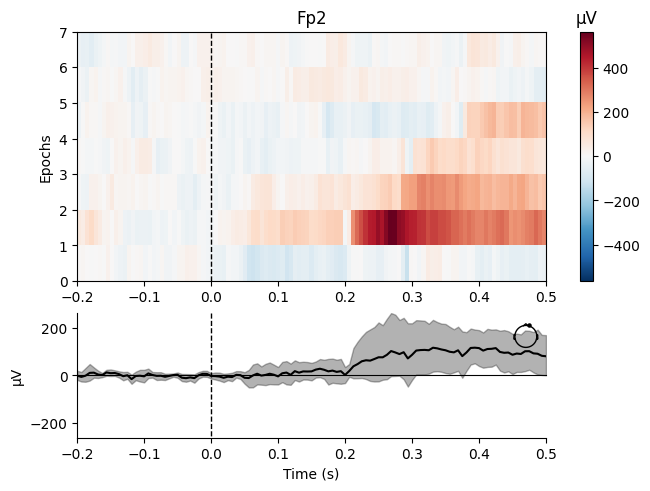

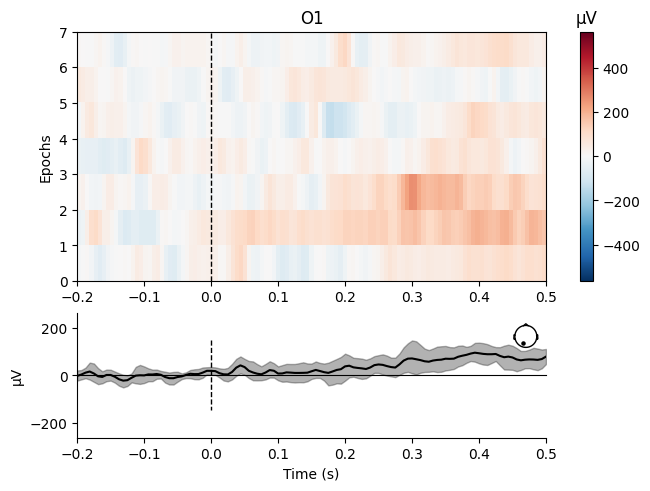

Not setting metadata
7 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
7 matching events found
No baseline correction applied
0 projection items activated


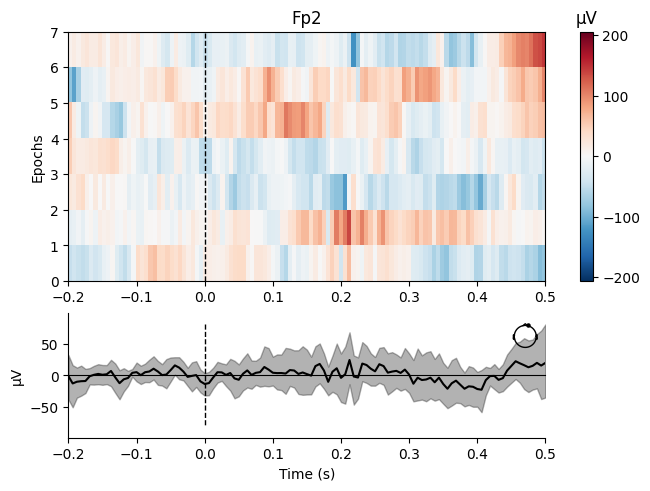

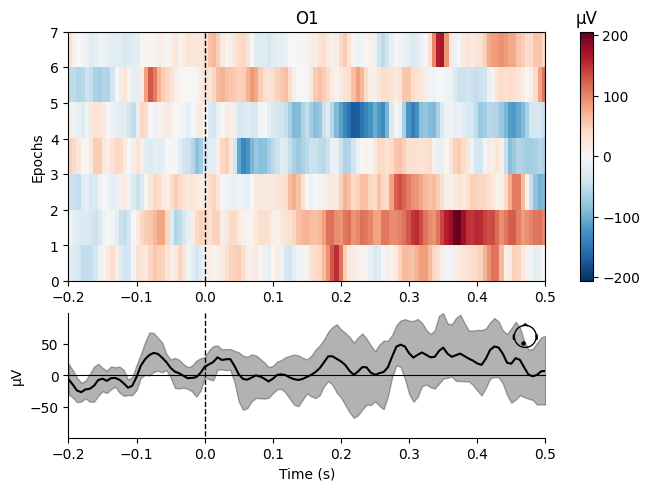

Not setting metadata
7 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
7 matching events found
No baseline correction applied
0 projection items activated


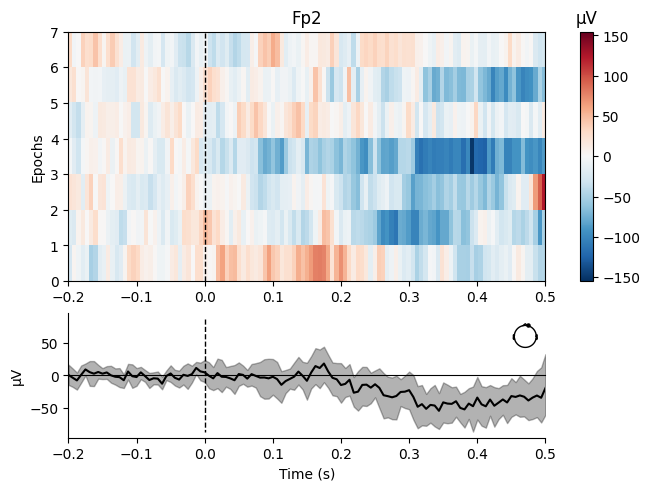

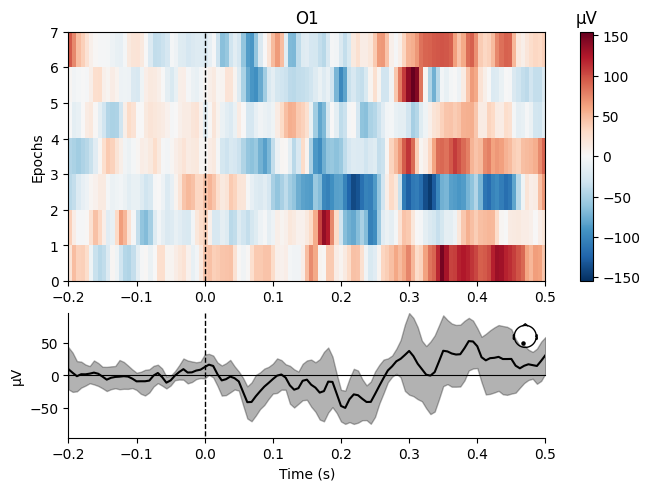

[<Figure size 640x480 with 4 Axes>, <Figure size 640x480 with 4 Axes>]

In [25]:
conds_we_care_about = ["rest", "motion/left_fist/both_fist", "motion/right_fist/both_feet"]
epochsn = epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place

rest_epochs = epochs["rest"]
left_both_fist_epochs = epochs["motion/left_fist/both_fist"]
right_fist_both_feet_epochs = epochs["motion/right_fist/both_feet"]
del raw, epochs  # free up memory

print(left_both_fist_epochs.ch_names)
print(left_both_fist_epochs.info['ch_names'])
# rest_epochs.plot(block = True )

rest_epochs.plot_image(picks =[23,60])
left_both_fist_epochs.plot_image(picks =[23,60])
right_fist_both_feet_epochs.plot_image(picks =[23,60])

In [12]:
epochs.get_data()
target = epochs["motion/left_fist/both_fist"].average()
target
# print(epochs.info['chs'])

C:\Users\sanji\AppData\Local\Temp\ipykernel_10876\1107278140.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data()


Condition,motion/left_fist/both_fist
Data kind,average
Timepoints,113 samples
Channels,64 channels
Number of averaged epochs,8
Time range (secs),-0.2 – 0.5
Baseline (secs),-0.200 – 0.000 s


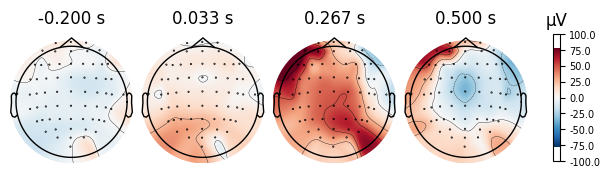

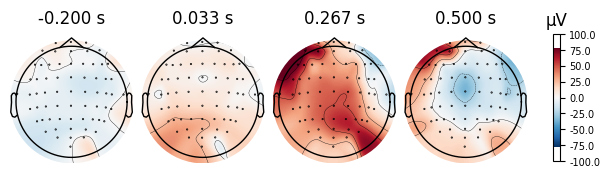

In [13]:
target.plot_topomap()

No projector specified for this dataset. Please consider the method self.add_proj.


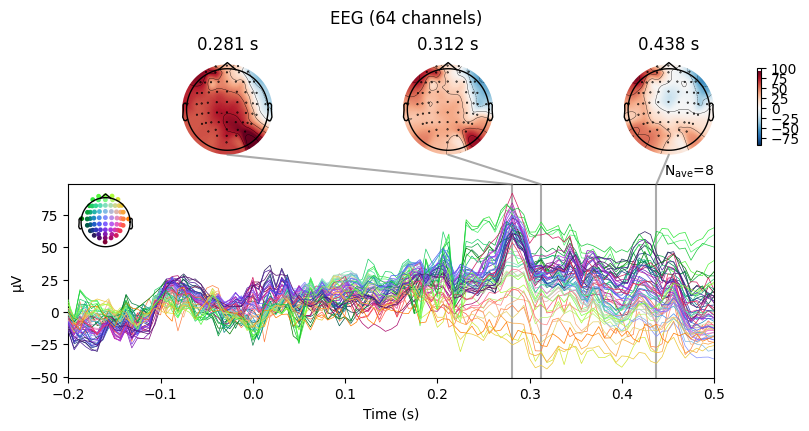

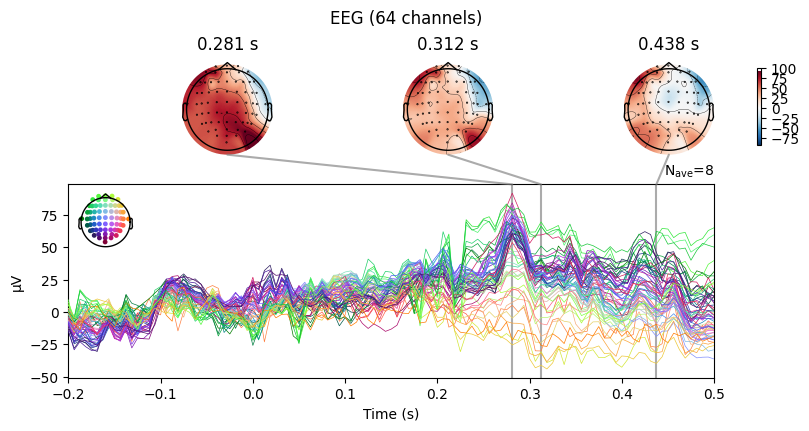

In [12]:
target.plot_joint()

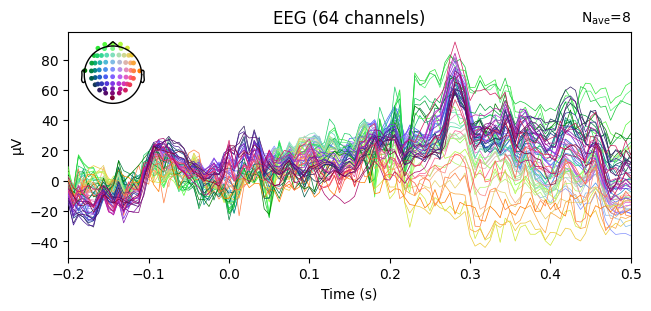

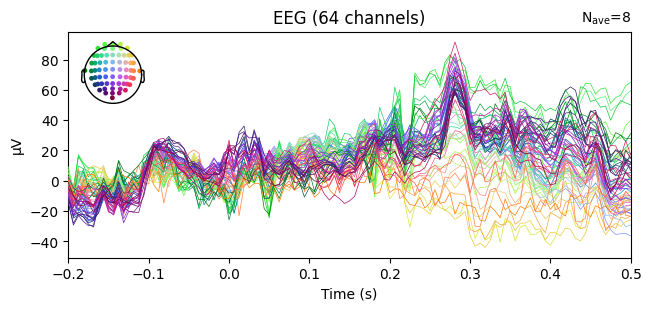

In [13]:
target.plot()

<Evoked | 'motion/left_fist/both_fist' (average, N=7), -0.2 – 0.5 s, baseline -0.2 – 0 s, 64 ch, ~134 kB>
<Evoked | 'motion/right_fist/both_feet' (average, N=7), -0.2 – 0.5 s, baseline -0.2 – 0 s, 64 ch, ~134 kB>
<Evoked | 'rest' (average, N=7), -0.2 – 0.5 s, baseline -0.2 – 0 s, 64 ch, ~134 kB>
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


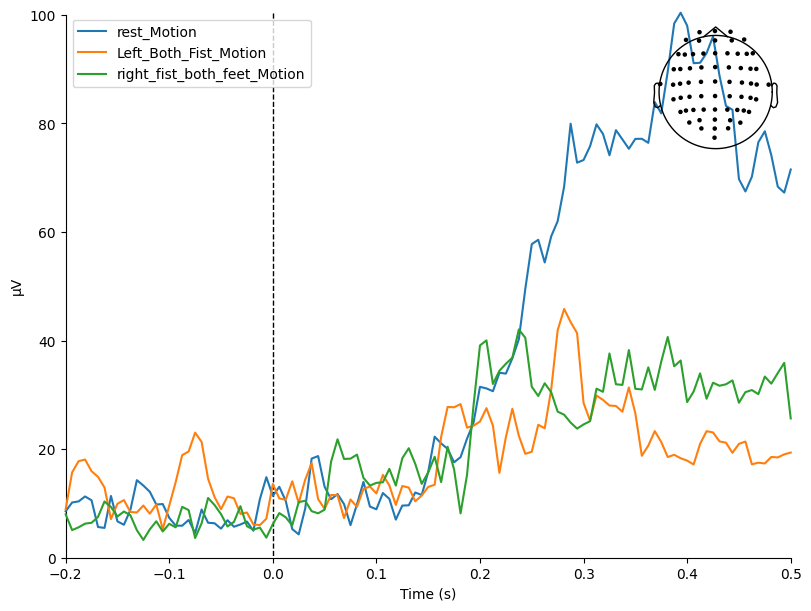

[<Figure size 800x600 with 2 Axes>]

In [14]:
# First, compute the average (evoked) responses for each condition

left_both_fist_evoked = left_both_fist_epochs.average()
right_fist_both_feet_evoked = right_fist_both_feet_epochs.average()
rest_epochs_evoked = rest_epochs.average()

print(left_both_fist_evoked)
print(right_fist_both_feet_evoked)
print(rest_epochs_evoked)

mne.viz.plot_compare_evokeds(
    dict(rest_Motion = rest_epochs_evoked, Left_Both_Fist_Motion=left_both_fist_evoked, right_fist_both_feet_Motion=right_fist_both_feet_evoked),
    legend="upper left",
    show_sensors="upper right",
)


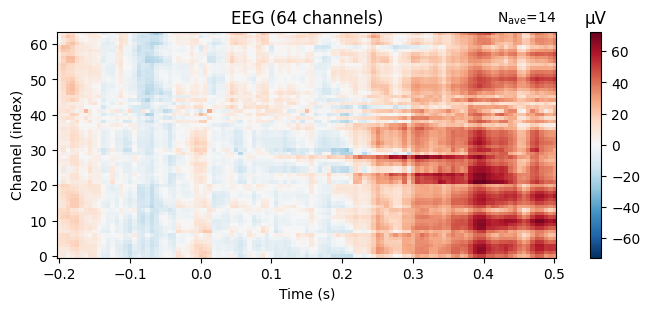

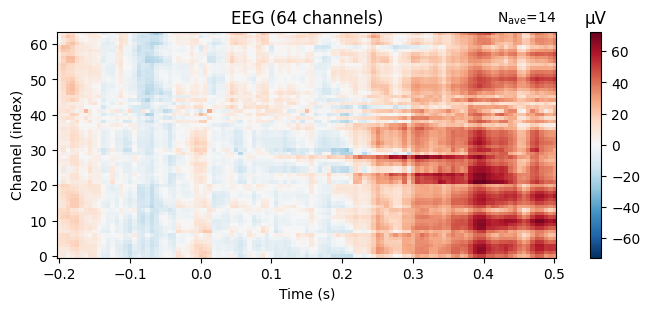

In [15]:
diff = mne.combine_evoked ((rest_epochs_evoked, -left_both_fist_evoked), weights = 'equal')
diff.plot_image()

In [16]:
rois = mne.channels.make_1020_channel_selections(diff.info, midline = "z12")
rois

{'Left': array([55, 56, 46, 47, 48, 44, 14, 15, 40, 42,  7,  8, 38,  0,  1, 30, 29,
        31, 25, 24]),
 'Midline': array([63, 61, 60, 62, 57, 51, 49, 50, 18, 16, 17, 11,  9, 10,  2,  4,  3,
        32, 34, 33, 26, 21, 23, 22]),
 'Right': array([59, 58, 54, 53, 52, 45, 20, 19, 43, 41, 13, 12, 39,  6,  5, 36, 35,
        37, 27, 28])}

[<Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>]

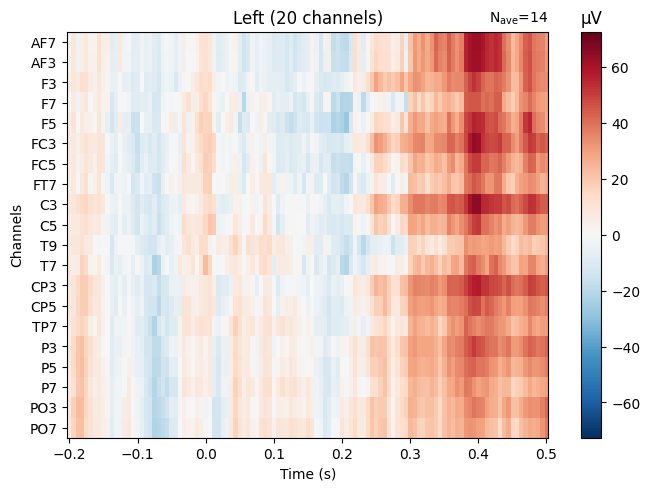

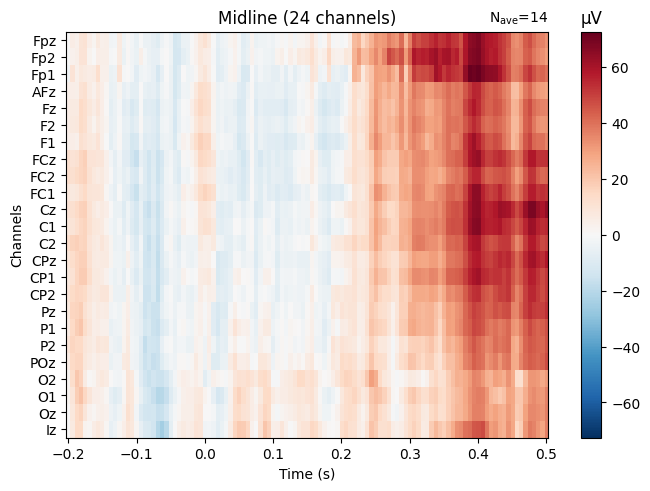

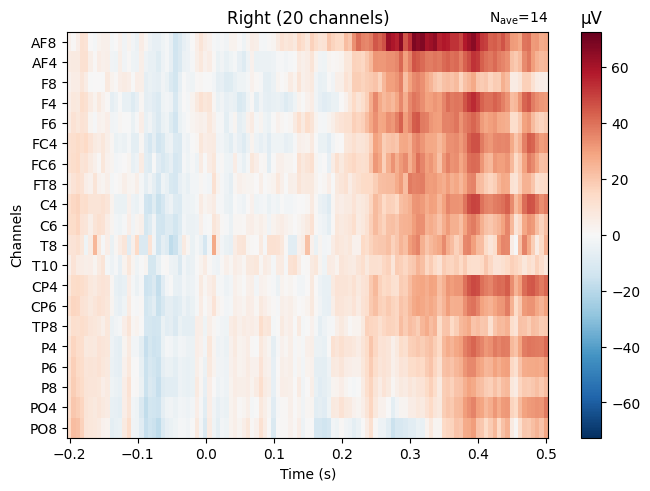

In [17]:
diff.plot_image(group_by = rois, show = False, show_names = "all")

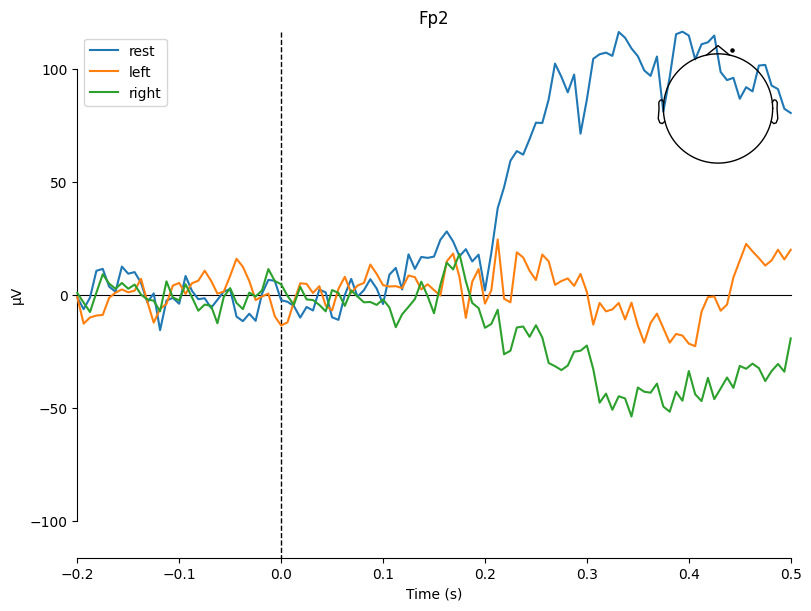

[<Figure size 800x600 with 2 Axes>]

In [18]:
mne.viz.plot_compare_evokeds({"rest": rest_epochs_evoked,
                             "left": left_both_fist_evoked,
                             "right": right_fist_both_feet_evoked},
                             picks= [23])

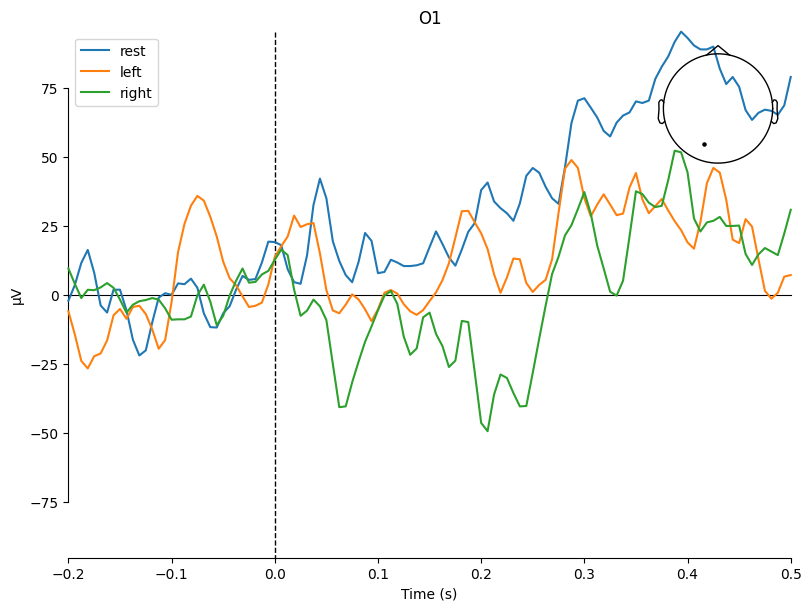

[<Figure size 800x600 with 2 Axes>]

In [19]:
mne.viz.plot_compare_evokeds({"rest": rest_epochs_evoked,
                             "left": left_both_fist_evoked,
                             "right": right_fist_both_feet_evoked},
                             picks= [60])

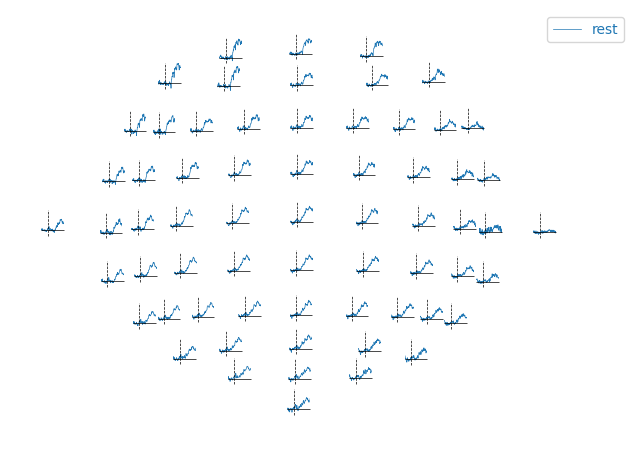

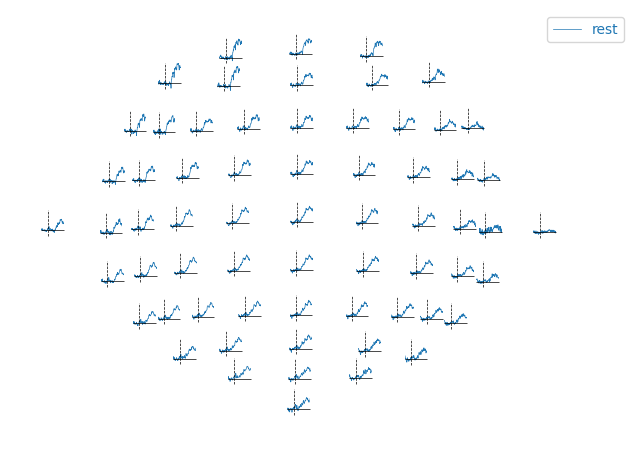

In [20]:
rest_epochs_evoked.plot_topo()

Time Frequency stuff

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\sanji\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


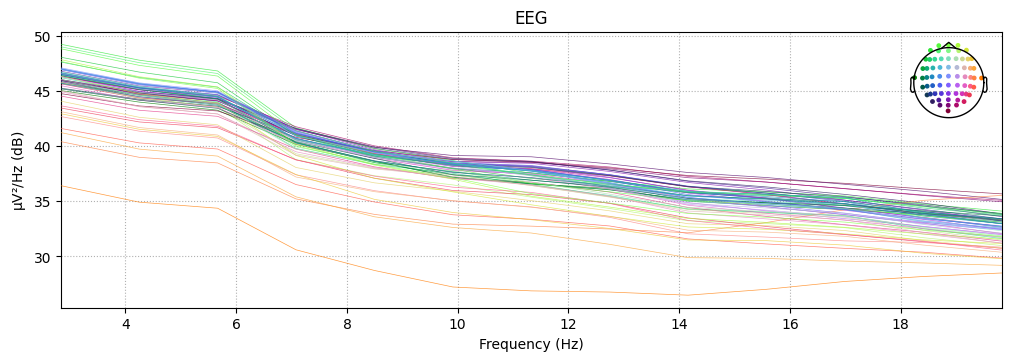

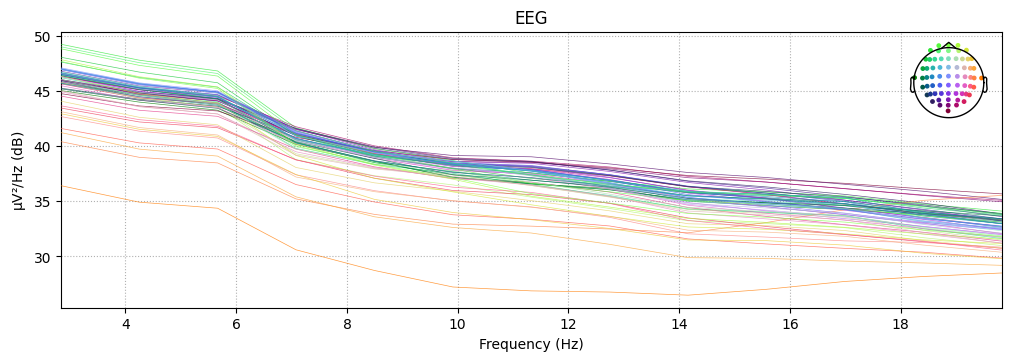

In [21]:
epochs.plot_psd(fmin=2, fmax=20)

In [22]:
from mne.time_frequency import tfr_morlet
freqs = list(range(3,60))
tfr_rest = tfr_morlet(rest_epochs, freqs, 1, return_itc=False)
tfr_left = tfr_morlet(left_both_fist_epochs, freqs, 1, return_itc=False)

Applying baseline correction (mode: mean)
No baseline correction applied
No baseline correction applied


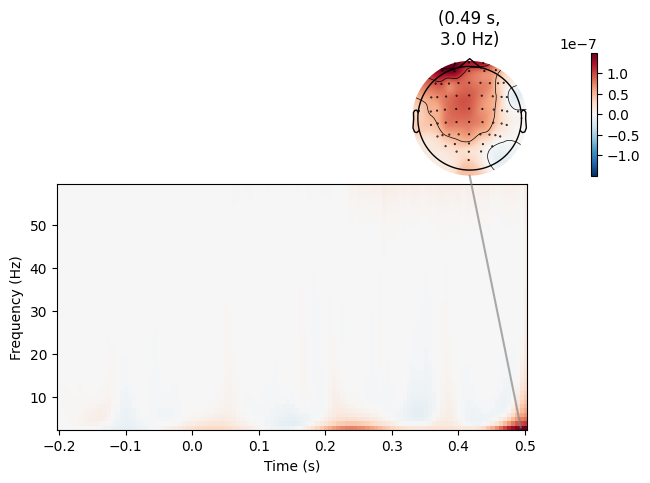

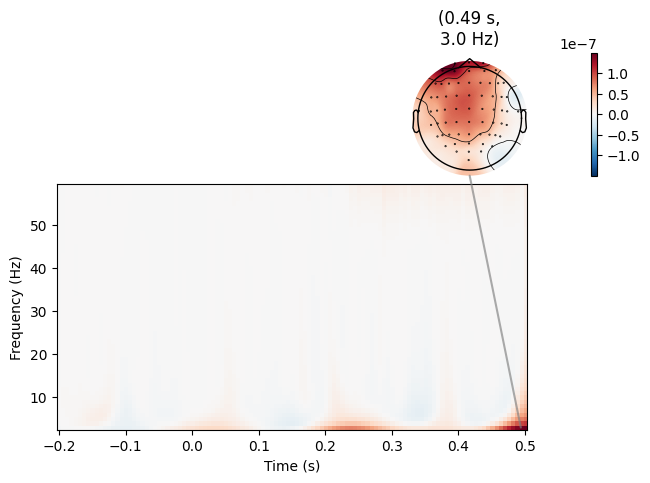

In [23]:
tfr_contrast = mne.combine_evoked((tfr_left, tfr_rest), (-.5,.5))
tfr_contrast.apply_baseline((None, 0))
tfr_contrast.plot_joint()

No baseline correction applied


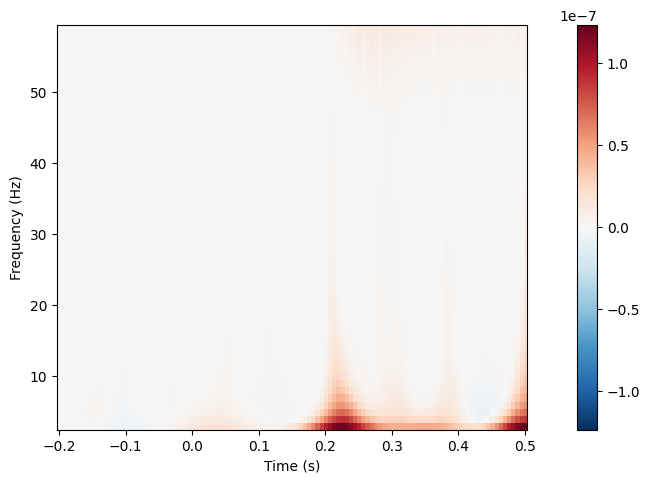

[<Figure size 640x480 with 2 Axes>]

In [24]:
tfr_contrast.plot(picks=[23])

Machine Learning Algorithm Implementation

In [29]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score


In [40]:
X = epochs.get_data()
Y = event_id.get_data()
X.shape, Y.shape

C:\Users\sanji\AppData\Local\Temp\ipykernel_10876\2875977060.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = epochs.get_data()


AttributeError: 'dict' object has no attribute 'get_data'

In [37]:
from mne.decoding import Vectorizer

clf = make_pipeline(Vectorizer(), StandardScaler(), LinearSVC(class_weight= "balanced"))
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [38]:
clf.fit(X, Y)

C:\Users\sanji\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 <mne.decoding.transformer.Vectorizer object at 0x000001FCB54711D0>),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(class_weight='balanced'))])

In [36]:
clf.predict(X[:, 29])

ValueError: Shape of X used in fit and transform must be same